## Random Forest

Loading data...
Dataset shape: (87253, 44)

Target variable distribution:
y_active
0    47870
1    39383
Name: count, dtype: int64
Class balance: y_active
0    0.548634
1    0.451366
Name: proportion, dtype: float64

Dropping ID columns: ['mlogId', 'userId', 'creatorId']

Numeric features: 38
Categorical features: 2

Training set size: (69802, 40)
Test set size: (17451, 40)

Training Random Forest model...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s



MODEL PERFORMANCE METRICS

Accuracy: 0.7739

Classification Report:
              precision    recall  f1-score   support

           0     0.7501    0.8818    0.8106      9574
           1     0.8173    0.6429    0.7197      7877

    accuracy                         0.7739     17451
   macro avg     0.7837    0.7623    0.7651     17451
weighted avg     0.7804    0.7739    0.7696     17451


Confusion Matrix:
[[8442 1132]
 [2813 5064]]

ROC-AUC Score: 0.8440
F1 Score (weighted): 0.7696

CROSS-VALIDATION SCORES


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.4s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.4s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concu


CV Accuracy Scores: [0.75897142 0.76498818 0.77048711 0.76045845 0.76325215]
Mean CV Accuracy: 0.7636 (+/- 0.0080)

TOP 20 FEATURE IMPORTANCES

                             feature  importance
7                          province    0.097282
18                 mlogViewTime_log    0.095143
17                    pop_index_pca    0.082932
0                                dt    0.075359
22            usr_total_impressions    0.069178
19              impressPosition_log    0.065411
8                       publishTime    0.065194
11                           talkId    0.060554
31               usr_action_entropy    0.051974
10                        contentId    0.049864
39  usr_followlog_x_actionrate_mean    0.044603
20                    followCnt_log    0.040662
13                    creator_level    0.035087
24                    usr_like_rate    0.022587
36       usr_sum_isLike_x_followlog    0.021062
14                  PushlishMlogCnt    0.020329
30           usr_action_types_taken   

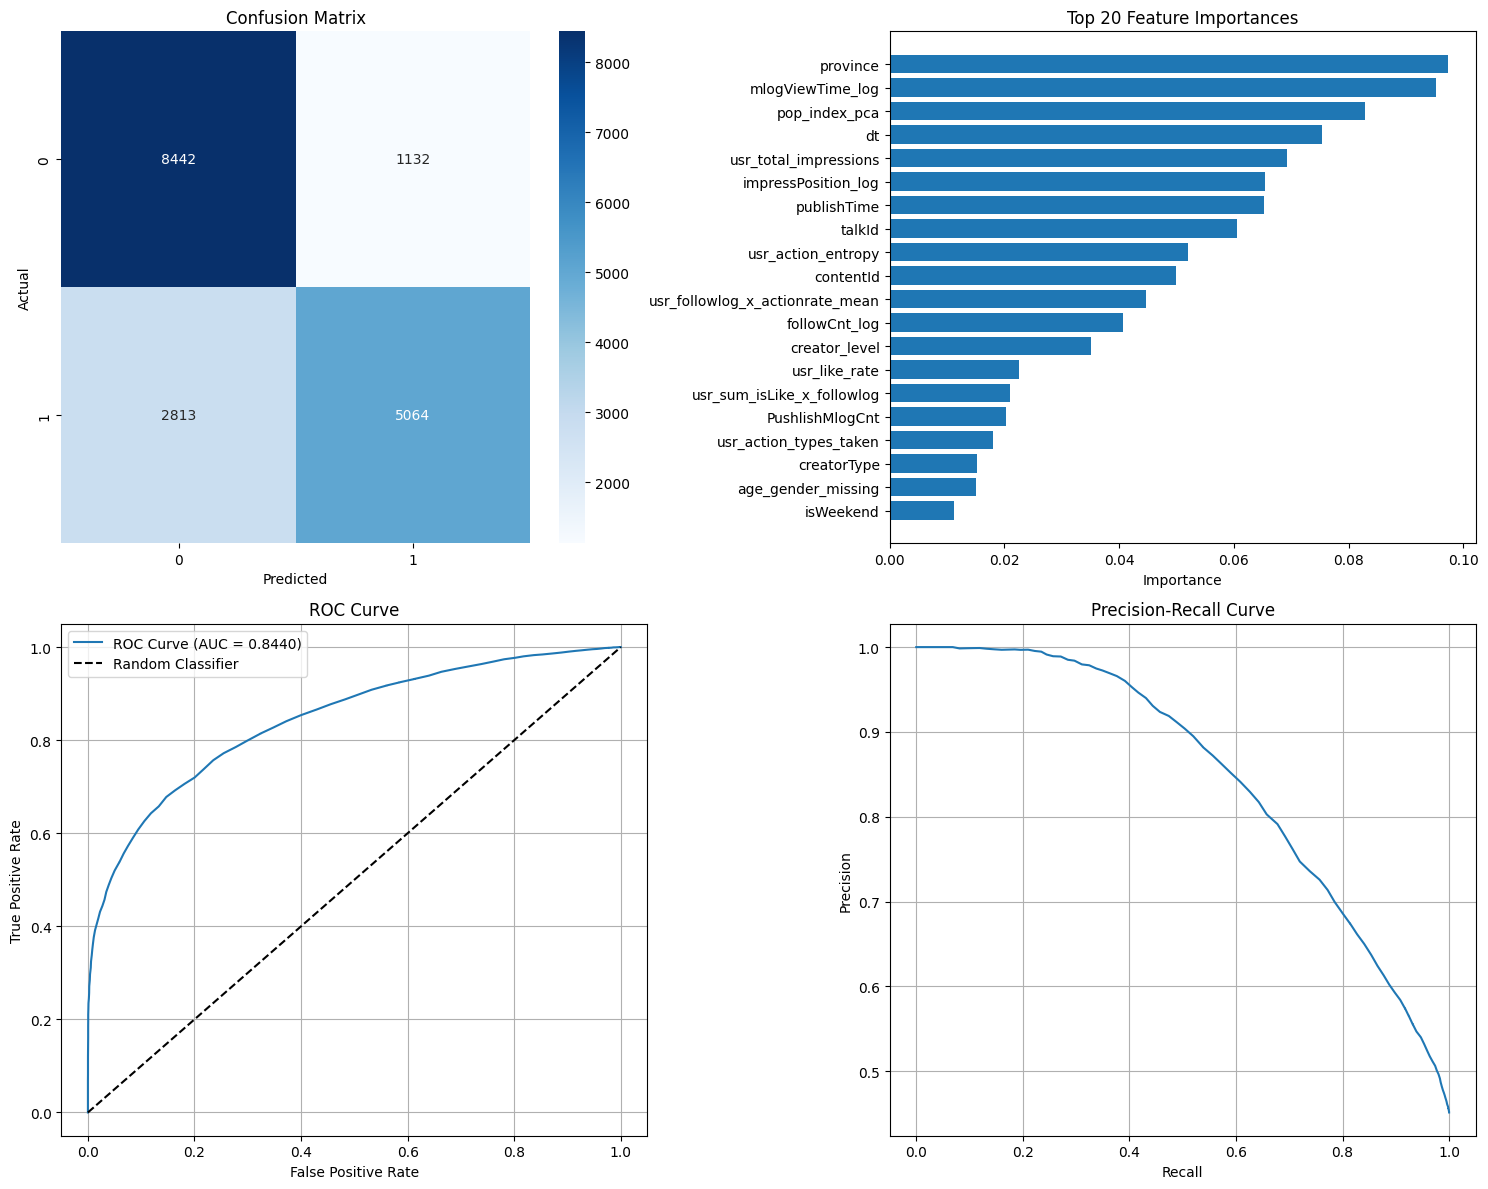


HYPERPARAMETER TUNING (Grid Search)
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  34.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.3min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.3min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, precision_recall_curve,
                             f1_score, accuracy_score)
import matplotlib.pyplot as plt
import seaborn as sns

# ==================== DATA LOADING ====================
print("Loading data...")
df = pd.read_csv("../data/cleaned_data.csv")

print(f"Dataset shape: {df.shape}")
print(f"\nTarget variable distribution:\n{df['y_active'].value_counts()}")
print(f"Class balance: {df['y_active'].value_counts(normalize=True)}")

# ==================== FEATURE PREPARATION ====================
# Separate features and target
target = 'y_active'

# Drop ID columns - they have no predictive value and can cause overfitting
id_columns = ['mlogId', 'userId', 'creatorId']
columns_to_drop = [target] + [col for col in id_columns if col in df.columns]

print(f"\nDropping ID columns: {[col for col in id_columns if col in df.columns]}")

X = df.drop(columns=columns_to_drop)
y = df[target]

# Identify and handle different column types
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumeric features: {len(numeric_cols)}")
print(f"Categorical features: {len(categorical_cols)}")

# Handle categorical variables (if any)
# Option 1: Drop categorical columns (simple approach)
# X = X[numeric_cols]

# Option 2: One-hot encoding (better for tree models if cardinality is reasonable)
from sklearn.preprocessing import LabelEncoder
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le

# Handle missing values (if any)
if X.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    X = X.fillna(X.median())

# ==================== TRAIN-TEST SPLIT ====================
# MODIFICATION POINT 1: Test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # Try: 0.15, 0.25, 0.3
    random_state=42,    # Try: different seeds for robustness check
    stratify=y          # Maintains class balance in splits
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# ==================== MODEL TRAINING ====================
# MODIFICATION POINT 2: Random Forest Hyperparameters
print("\nTraining Random Forest model...")

rf_model = RandomForestClassifier(
    n_estimators=100,           # Try: 50, 200, 300, 500 (more trees = better but slower)
    max_depth=None,             # Try: 10, 20, 30, 50 (limits tree depth, prevents overfitting)
    min_samples_split=2,        # Try: 5, 10, 20 (min samples to split node)
    min_samples_leaf=1,         # Try: 2, 4, 10 (min samples in leaf node)
    max_features='sqrt',        # Try: 'log2', 0.3, 0.5, None (features per split)
    max_samples=None,           # Try: 0.7, 0.8 (bootstrap sample size)
    bootstrap=True,             # Try: False (use all data for each tree)
    class_weight=None,          # Try: 'balanced', 'balanced_subsample' (handles imbalance)
    random_state=42,
    n_jobs=-1,                  # Use all CPU cores
    verbose=1
)

rf_model.fit(X_train, y_train)

# ==================== PREDICTIONS ====================
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# ==================== MODEL EVALUATION ====================
print("\n" + "="*60)
print("MODEL PERFORMANCE METRICS")
print("="*60)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ROC-AUC Score
try:
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")
except:
    print("\nROC-AUC Score: Not available (need probability predictions)")

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.4f}")

# ==================== CROSS-VALIDATION ====================
# MODIFICATION POINT 3: Cross-validation folds
print("\n" + "="*60)
print("CROSS-VALIDATION SCORES")
print("="*60)

cv_scores = cross_val_score(
    rf_model, X_train, y_train, 
    cv=5,                # Try: 3, 10 (number of folds)
    scoring='accuracy',  # Try: 'f1', 'roc_auc', 'precision', 'recall'
    n_jobs=-1
)

print(f"\nCV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# ==================== FEATURE IMPORTANCE ====================
print("\n" + "="*60)
print("TOP 20 FEATURE IMPORTANCES")
print("="*60)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n", feature_importance.head(20))

# ==================== VISUALIZATIONS ====================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix')
axes[0, 0].set_ylabel('Actual')
axes[0, 0].set_xlabel('Predicted')

# 2. Feature Importance (Top 20)
top_features = feature_importance.head(20)
axes[0, 1].barh(top_features['feature'], top_features['importance'])
axes[0, 1].set_xlabel('Importance')
axes[0, 1].set_title('Top 20 Feature Importances')
axes[0, 1].invert_yaxis()

# 3. ROC Curve
try:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    axes[1, 0].plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    axes[1, 0].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    axes[1, 0].set_xlabel('False Positive Rate')
    axes[1, 0].set_ylabel('True Positive Rate')
    axes[1, 0].set_title('ROC Curve')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
except:
    axes[1, 0].text(0.5, 0.5, 'ROC Curve not available', 
                    ha='center', va='center')

# 4. Precision-Recall Curve
try:
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    axes[1, 1].plot(recall, precision)
    axes[1, 1].set_xlabel('Recall')
    axes[1, 1].set_ylabel('Precision')
    axes[1, 1].set_title('Precision-Recall Curve')
    axes[1, 1].grid(True)
except:
    axes[1, 1].text(0.5, 0.5, 'Precision-Recall Curve not available', 
                    ha='center', va='center')

plt.tight_layout()
plt.savefig('random_forest_evaluation.png', dpi=300, bbox_inches='tight')
print("\nVisualization saved as 'random_forest_evaluation.png'")
plt.show()

# ==================== OPTIONAL: HYPERPARAMETER TUNING ====================
# MODIFICATION POINT 4: Grid Search for optimal hyperparameters
# Uncomment the following to perform hyperparameter tuning (takes longer)


print("\n" + "="*60)
print("HYPERPARAMETER TUNING (Grid Search)")
print("="*60)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',  # Try: 'f1', 'roc_auc'
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(f"\nTest Accuracy (Best Model): {accuracy_score(y_test, y_pred_best):.4f}")


print("\n" + "="*60)
print("MODEL TRAINING COMPLETE")
print("="*60)